In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report
%matplotlib inline

### TODO: Use Logistic regression classifier

In [2]:
dataframe = pd.read_csv('../data/loan_prediction.csv')
X = dataframe.iloc[:,0:5]
y = dataframe.iloc[:,5]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=9)

In [3]:
logistic_regressor = LogisticRegression()

### TODO: Pipeline with polynomial features

In [4]:
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', logistic_regressor)])

In [5]:
pipeline.fit(X_train, y_train)
y_pred_l = pipeline.predict(X_test)


### TODO: Use GreicSearchCV for hyperparameter search

In [6]:
params = {'add_poly_features__degree':[1,2,3,4,5],
#           'add_poly_features_interaction_only': [True, False],
          'logistic_regression__penalty':['l1','l2']}

In [7]:
def do_grid_search(X_train, X_test, y_train, pipeline, params):
    grid_search = GridSearchCV(estimator=pipeline, param_grid=params)
    grid_search.fit(X_train,y_train)
    return grid_search

In [8]:
grid_search = do_grid_search(X_train, X_test, y_train, pipeline, params)
cross_val_score(grid_search.best_estimator_,X_train,y_train)

array([ 0.81707317,  0.74390244,  0.76687117])

In [9]:
y_pred_g = grid_search.predict(X_test)
y_pred_gp = grid_search.predict_proba(X_test)

In [10]:
y_pred_gp[:,1]

array([ 0.82904788,  0.80773558,  0.70299416,  0.81469856,  0.37461241,
        0.36419608,  0.84232111,  0.37675768,  0.80651012,  0.33415065,
        0.78662674,  0.85446641,  0.34631095,  0.81117816,  0.81833768,
        0.81044951,  0.80814083,  0.33639752,  0.81460618,  0.81455938,
        0.83012366,  0.80848645,  0.81002297,  0.80884814,  0.36873435,
        0.78949067,  0.80772711,  0.83657055,  0.84061038,  0.79975607,
        0.80333637,  0.39252598,  0.80939749,  0.78658009,  0.34705297,
        0.79709676,  0.78879375,  0.80353964,  0.81721799,  0.8046509 ,
        0.79552389,  0.83651534,  0.81640492,  0.81906136,  0.81258611,
        0.3499439 ,  0.76671394,  0.80153233,  0.80019834,  0.37571865,
        0.80158594,  0.80232238,  0.82491678,  0.3625001 ,  0.29796622,
        0.80616719,  0.33987754,  0.35324125,  0.82218904,  0.81145889,
        0.813658  ,  0.37339777,  0.78561398,  0.35201026,  0.7767534 ,
        0.79068065,  0.32511762,  0.34691557,  0.3822776 ,  0.35

### TODO: Get Acuracy, Sensitivity, Specificity, AUC, Precision

In [11]:
confusion_matrix = confusion_matrix(y_test, y_pred_l)

In [12]:
def y_stats(c_matrix):
    tn, fp, fn, tp = c_matrix.reshape(-1)
#     print tn, fp, fn, tp
    specificity = tn / float(tn + fp)
    sensitivity = tp / float(fn + tp)
    accuracy = float(tn + tp) / c_matrix.sum()
    precision = tp / float(tp + fp)
    return specificity, sensitivity, accuracy, precision

In [13]:
specificity, sensitivity, accuracy, precision = y_stats(confusion_matrix)

In [14]:
specificity, sensitivity, accuracy, precision

(0.33333333333333331,
 0.94666666666666666,
 0.7073170731707317,
 0.68932038834951459)

### TODO: Create AUCROC curve

In [15]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_gp[:,1])
roc_auc = auc(fpr, tpr)
print roc_auc

0.678888888889


Text(0,0.5,u'Sensitivity')

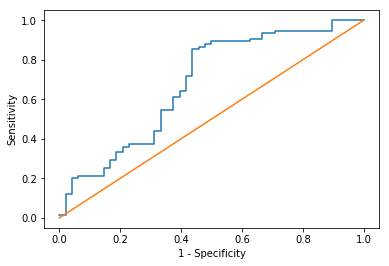

In [16]:
plt.plot(fpr, tpr)
x = np.linspace(0, 1, 5)
plt.plot(x, x)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')

In [17]:
y_test.shape, y_pred_g.shape

((123,), (123,))

In [18]:
y_test.value_counts()

1    75
0    48
Name: Loan_Status, dtype: int64